In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import pandas as pd

In [9]:
# Create a Spark session
spark = SparkSession.builder.appName("Correlation").getOrCreate()

# Load your data into a DataFrame using pandas, then spark
df_pandas = pd.read_csv("kworb_popularity.csv")
df = spark.createDataFrame(df_pandas)

# Select the columns you want to calculate the correlation for
selected_cols = ["popularity","danceability","energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Assemble the selected columns into a vector
assembler = VectorAssembler(inputCols=selected_cols, outputCol="features")
data_with_features = assembler.transform(df).select("features")

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(data_with_features, "features").head()

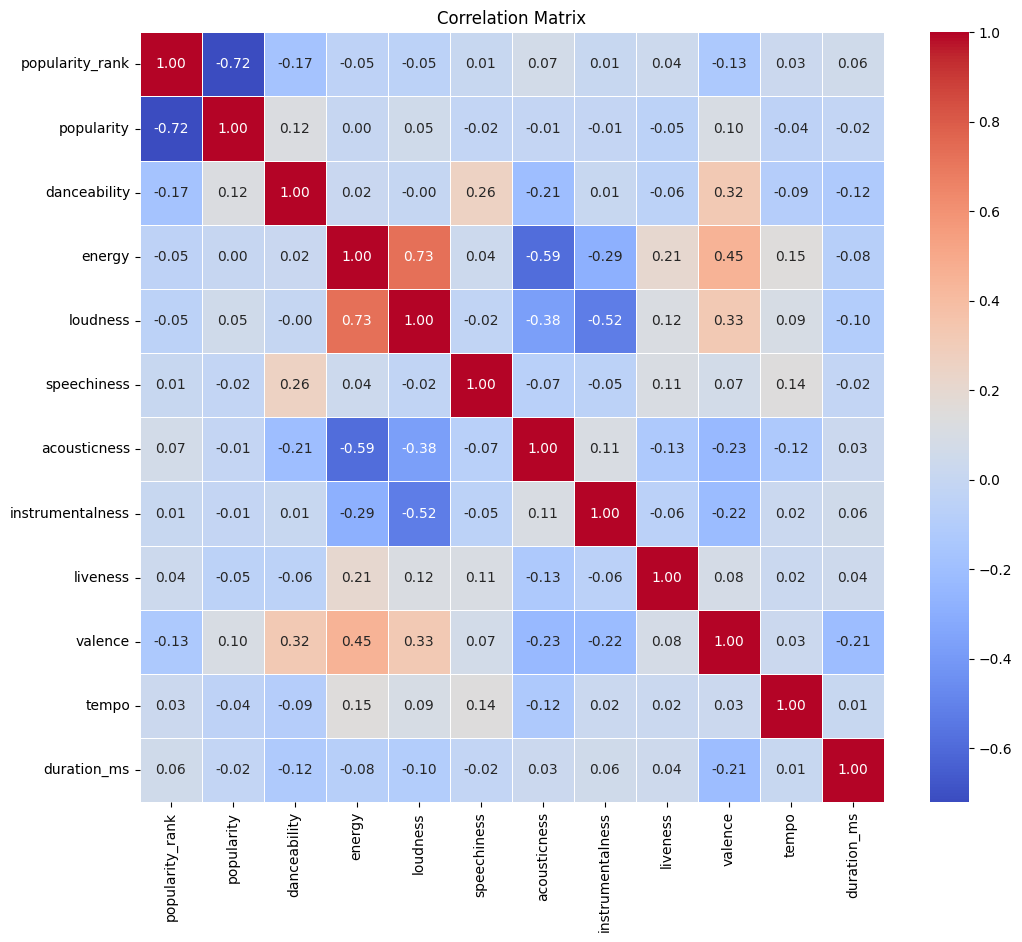

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df = pd.DataFrame(correlation_matrix[0].toArray(),
                              columns=selected_cols,
                              index=selected_cols)

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set heatmap title and display it
plt.title('Correlation Matrix')
plt.show()